In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import norm


In [2]:
train_data = pd.read_csv("train.csv")
vali_data = pd.read_csv("test.csv")

In [3]:
vali_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
House_id = vali_data["Id"]

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

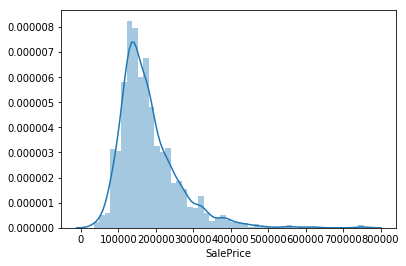

In [8]:
sns.distplot(train_data['SalePrice'])

In [9]:
# positive skewness -- Mean > Median > Mode 
train_data["SalePrice"].skew()


1.8828757597682129

In [10]:
train_data["SalePrice"].kurt()

6.536281860064529

In [11]:
# The SalePrice is not a normal distribution.
# train_data['SalePrice'] = np.log(train_data['SalePrice'])
# sns.distplot(train_data['SalePrice'], fit=norm)
# fig = plt.figure()

In [12]:
# decide which features should include -- and exclude the multicolinearity features. 

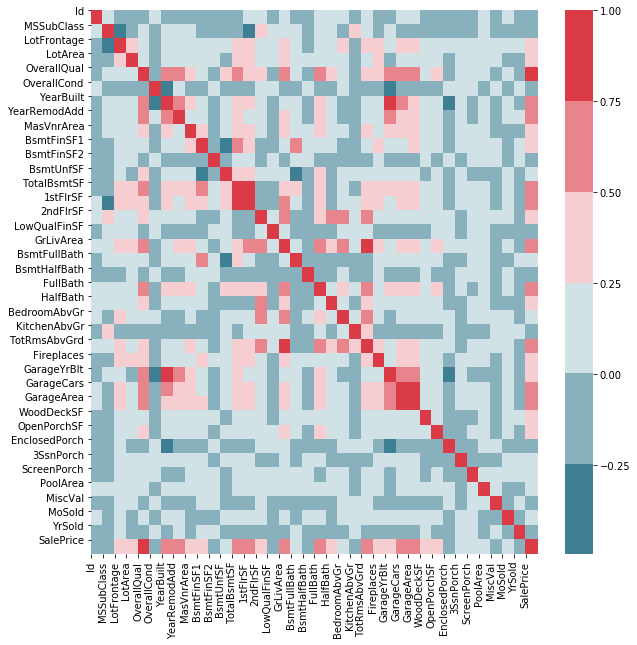

In [13]:
# correlationship among variables 
corr = train_data.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=False)
sns.heatmap(corr, cmap=colormap, fmt=".2f")
# sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

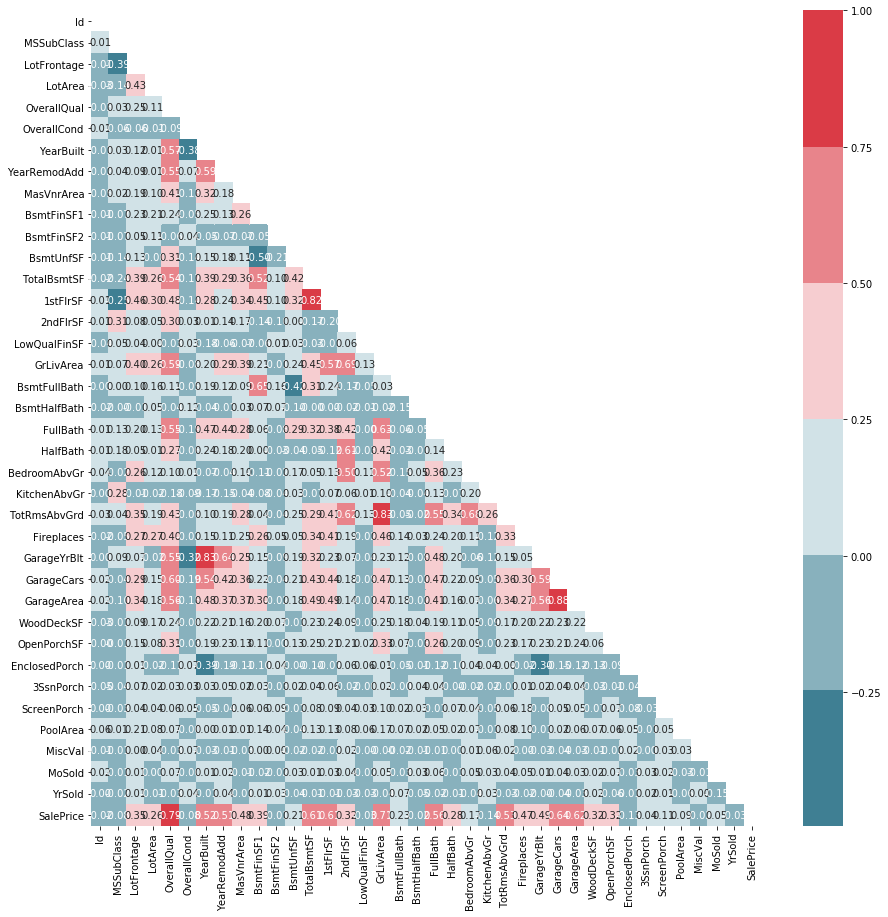

In [14]:
# drop mirror correlationsip 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap=colormap, annot = True,fmt=".2f", mask=mask)


In [15]:
# From the previous plt, we can know the sales price is highly correlated with 
# OverallQual, YearBuilt, YearRemodadd, TotalBsmSF, 1stFlrSF, 
# GrLivArea, FULLBath, TotRmsAbvGrd, GaeageYeaBilt, GarageArea, Garagecars
# GarageYrBilt is hithly correlated with YearBuilt, YearRemodadd, 
# GarageArea is higly correlated with Garage cars, then drop one. 
# then,drop these three 

In [16]:
# The final  8 Features 
Features = ["OverallQual", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd","GarageArea"]

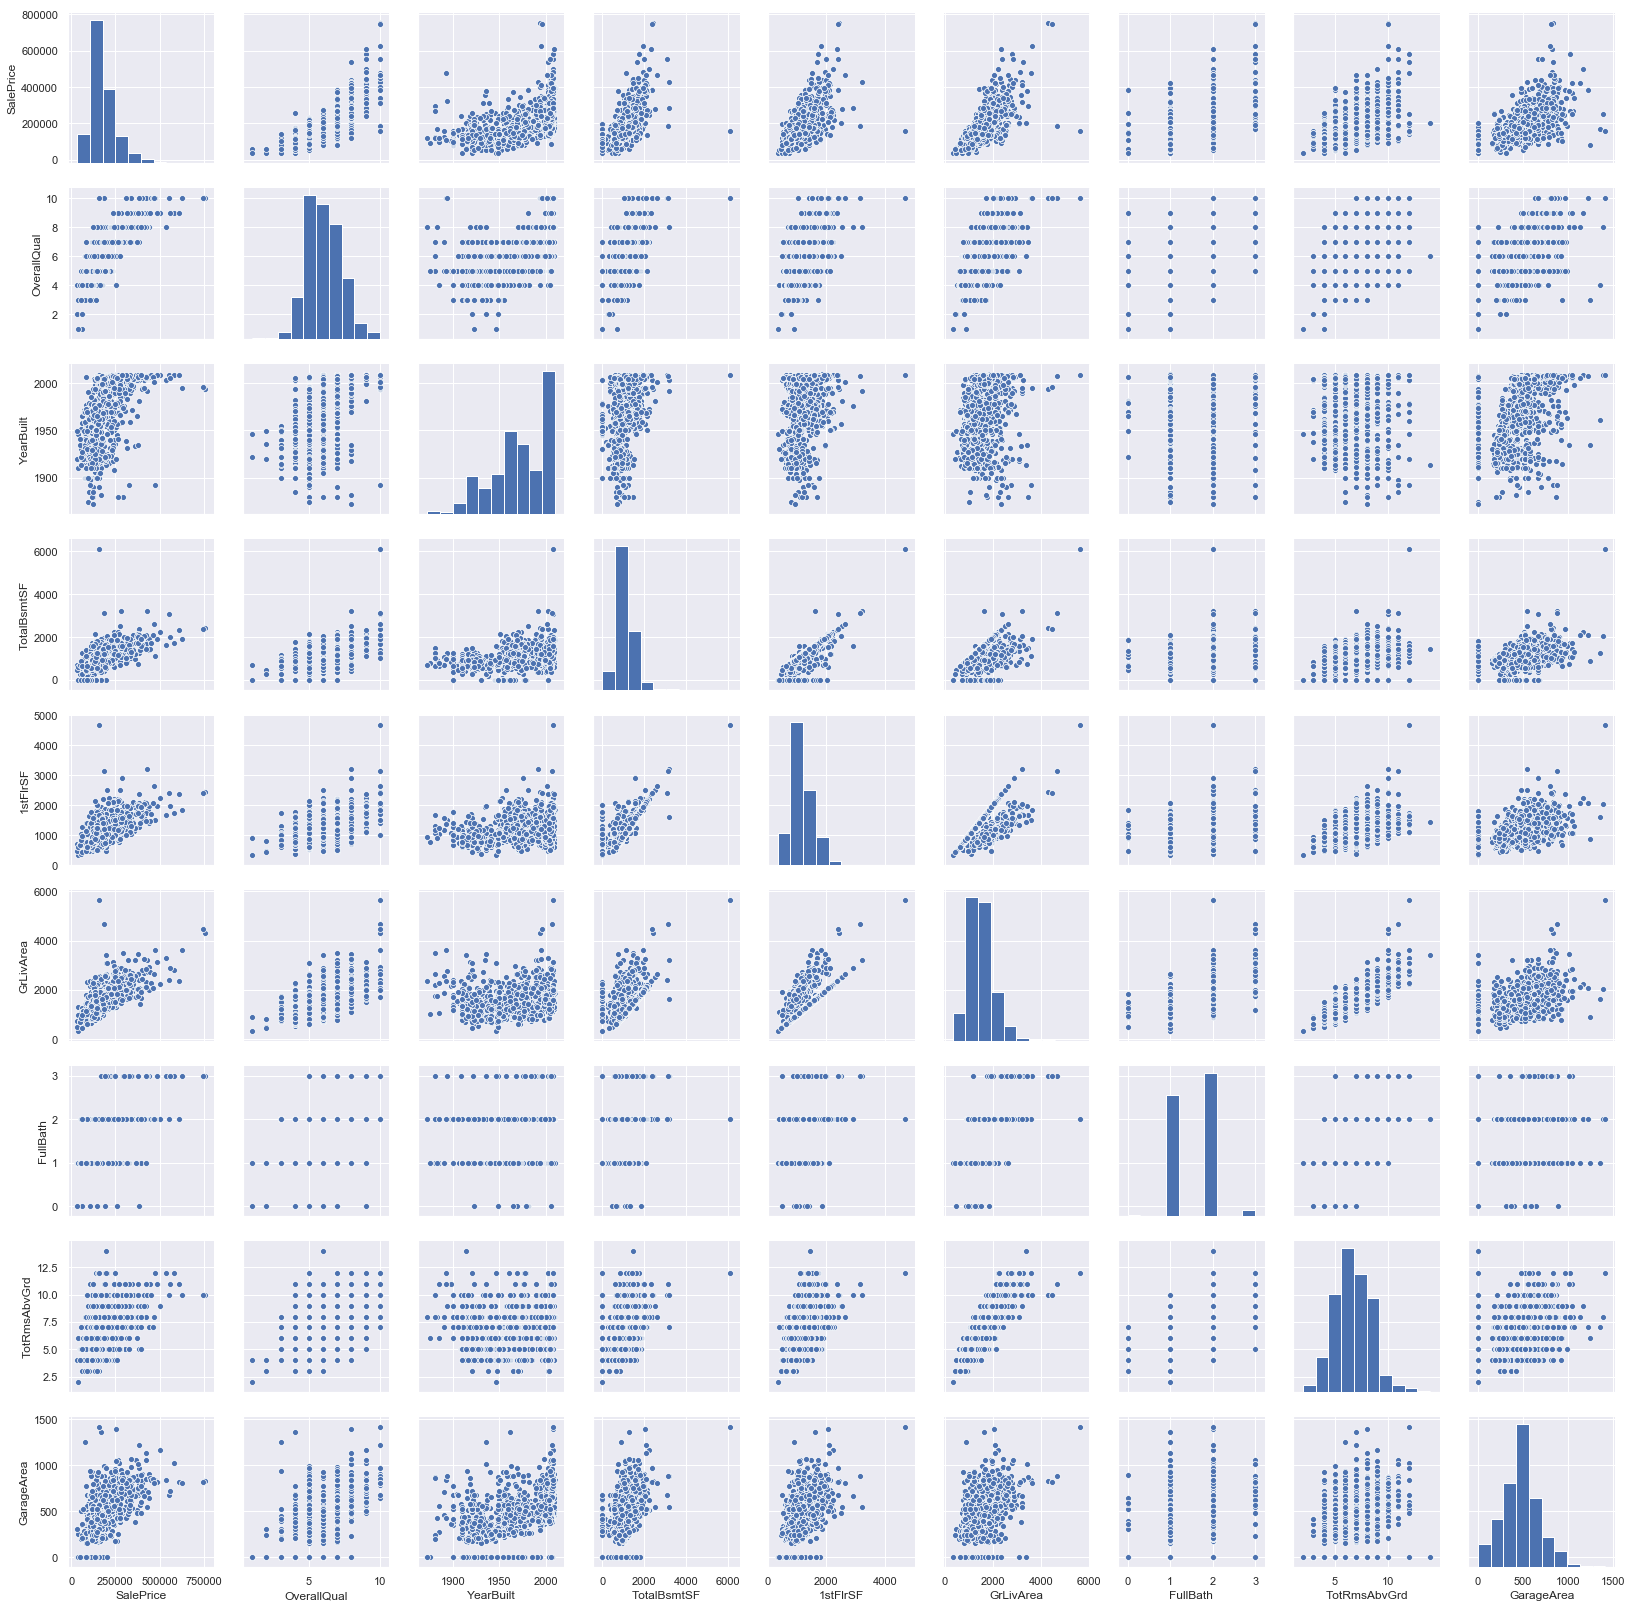

In [17]:
sns.set()
cols =["SalePrice","OverallQual", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd","GarageArea"]
sns.pairplot(train_data[cols],size =2.5)
plt.show()

In [18]:
count_missing_data =train_data.isnull().sum().sort_values(ascending = False)

In [19]:
count_missing_data.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [20]:
# Based on our plots, these columns are all useless for our regression and then delete all of them.

train_data =train_data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish',
                'GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical'
                 ])

In [21]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
vali_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
new_val_data =vali_data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish',
                'GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical'
                 ])

In [24]:
new_val_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [25]:
# delete some outliers 
Features = ["OverallQual", "YearBuilt", "TotalBsmtSF", "1stFlrSF",    
        "GrLivArea", "FullBath", "TotRmsAbvGrd","GarageArea"]



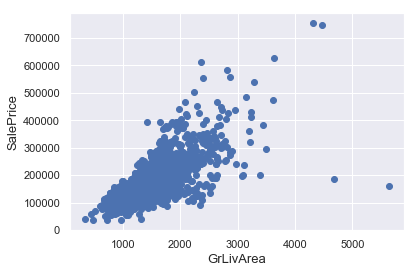

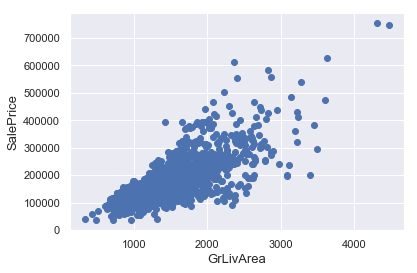

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# these two values are outliers.. not follow the regression 

train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice'] < 300000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

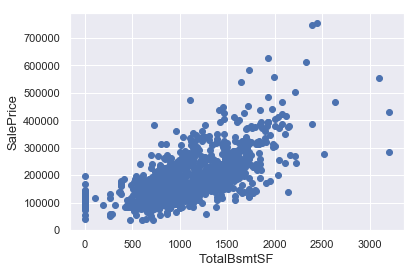

In [27]:
fig, ax = plt.subplots()
ax.scatter(y = train_data['SalePrice'], x = train_data['TotalBsmtSF'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

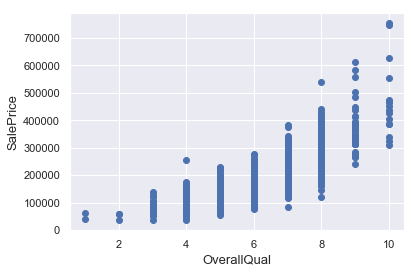

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['OverallQual'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

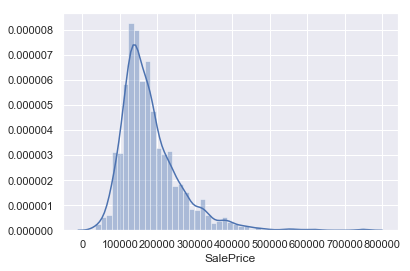

In [29]:
sns.distplot(train_data['SalePrice'])


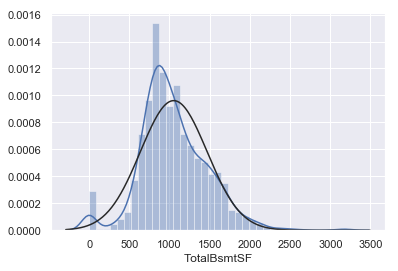

<Figure size 432x288 with 0 Axes>

In [30]:
sns.distplot(train_data['TotalBsmtSF'], fit=norm)
fig = plt.figure()

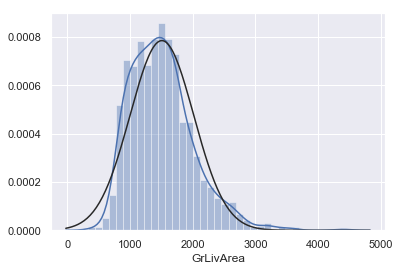

<Figure size 432x288 with 0 Axes>

In [31]:
sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()


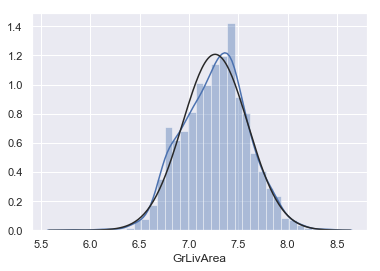

<Figure size 432x288 with 0 Axes>

In [32]:
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])
sns.distplot(train_data['GrLivArea'], fit=norm)
fig = plt.figure()

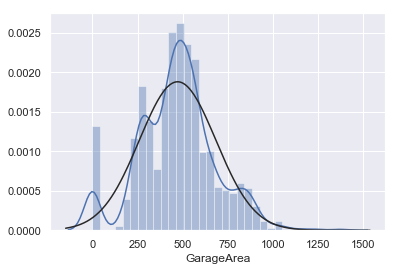

<Figure size 432x288 with 0 Axes>

In [33]:
sns.distplot(train_data['GarageArea'], fit=norm)
fig = plt.figure()



In [34]:
train_data=pd.get_dummies(train_data)

In [35]:
test_data = new_val_data[Features]
test_data = pd.get_dummies(test_data)

In [36]:
X = train_data[Features]

In [37]:
X.describe()
# No missing data

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,6.093964,1971.218107,1052.537037,1158.851166,7.266024,1.563786,6.510974,472.050069
std,1.376369,30.193754,414.982320,372.039498,0.330390,0.549891,1.615880,212.239248
min,1.000000,1872.000000,0.000000,334.000000,5.811141,0.000000,2.000000,0.000000
25%,5.000000,1954.000000,795.250000,882.000000,7.028644,1.000000,5.000000,331.500000
50%,6.000000,1972.500000,991.000000,1086.000000,7.287217,2.000000,6.000000,479.500000
75%,7.000000,2000.000000,1296.750000,1390.750000,7.482119,2.000000,7.000000,576.000000
max,10.000000,2010.000000,3206.000000,3228.000000,8.406485,3.000000,14.000000,1390.000000


In [38]:
X.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,7,2003,856,856,7.444249,2,8,548
1,6,1976,1262,1262,7.140453,2,6,460
2,7,2001,920,920,7.487734,2,6,608
3,7,1915,756,961,7.448334,1,7,642
4,8,2000,1145,1145,7.695303,2,9,836


In [39]:
y = train_data['SalePrice']

In [40]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [41]:
# Define model, specify a number for random_state to ensure same results each run
train_model = DecisionTreeRegressor(random_state= 1)
train_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [42]:
print ("Maing Predictions for the following 5 houses:")
print (X.head())
print ("The predictions are")
print (train_model.predict(X.head()))

Maing Predictions for the following 5 houses:
   OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0            7       2003          856       856   7.444249         2   
1            6       1976         1262      1262   7.140453         2   
2            7       2001          920       920   7.487734         2   
3            7       1915          756       961   7.448334         1   
4            8       2000         1145      1145   7.695303         2   

   TotRmsAbvGrd  GarageArea  
0             8         548  
1             6         460  
2             6         608  
3             7         642  
4             9         836  
The predictions are
[208500. 181500. 223500. 140000. 250000.]


In [43]:
# only use the train_data to test the model

predict_house_price = train_model.predict(X)

In [44]:
predict_house_price

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [45]:
# use root-mean-squared -error (RMSE)

In [46]:
RMSE = sqrt(mean_squared_error(y,predict_house_price))

In [47]:
RMSE

884.8760924008549

In [48]:
# imputes missing values in numerical data
# imputes missing values and applies a one-hot encoding to catergoricla data

In [49]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64','float64']]

In [50]:
numerical_transformer = SimpleImputer(strategy = "constant")

In [61]:
preprocessor = ColumnTransformer(
    transformers =[
       ("num", numerical_transformer, numerical_cols)
    ]
)

In [62]:
# model_2 = RandomForestRegressor(n_estimators= 100, random_state=0)
my_model = XGBRegressor(n_estimators=500,learning_rate= 0.05)
my_model.fit(X,y,)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [63]:
my_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', my_model)
])

In [64]:
my_pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='constant', verbose=0), ['OverallQual', 'YearBuilt', 'TotalBs... reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1))])

In [65]:
preds = my_pipeline.predict(test_data)

In [66]:
test_data["SalePrice"] = preds

In [67]:
test_data['Id'] = House_id

In [68]:
test_data.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice,Id
0,5,1961,882.0,896,896,1,5,730.0,234333.609375,1461
1,6,1958,1329.0,1329,1329,1,6,312.0,263744.156250,1462
2,5,1997,928.0,928,1629,2,6,482.0,254910.093750,1463
3,6,1998,926.0,926,1604,2,7,470.0,274957.437500,1464
4,8,1992,1280.0,1280,1280,2,5,506.0,392037.187500,1465


In [69]:
final_data = test_data[['Id','SalePrice']]

In [70]:
final_data.to_csv("Hourse price Prediction_5.csv" ,index = False)